<a href="https://colab.research.google.com/github/shubhamaswal205/Currency_detector/blob/main/currency_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
fid = drive.ListFile({'q':"title='archive.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('archive.zip')

In [9]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [10]:
!unzip archive.zip

Archive:  archive.zip
  inflating: indian_currency_new/training/10/0.jpg  
  inflating: indian_currency_new/training/10/1.jpg  
  inflating: indian_currency_new/training/10/10.jpg  
  inflating: indian_currency_new/training/10/100.jpg  
  inflating: indian_currency_new/training/10/102.jpg  
  inflating: indian_currency_new/training/10/103.jpg  
  inflating: indian_currency_new/training/10/11.jpg  
  inflating: indian_currency_new/training/10/12.jpg  
  inflating: indian_currency_new/training/10/13.jpg  
  inflating: indian_currency_new/training/10/14.jpg  
  inflating: indian_currency_new/training/10/17.jpg  
  inflating: indian_currency_new/training/10/18.jpg  
  inflating: indian_currency_new/training/10/19.jpg  
  inflating: indian_currency_new/training/10/2.jpg  
  inflating: indian_currency_new/training/10/20.jpg  
  inflating: indian_currency_new/training/10/21.jpg  
  inflating: indian_currency_new/training/10/22.jpg  
  inflating: indian_currency_new/training/10/24.jpg  
  infl

In [11]:
PATH = '/content/indian_currency_new'

In [12]:
os.listdir(PATH)

['validation', 'training']

In [13]:
train_dir = os.path.join(PATH,
                         'training')
test_dir = os.path.join(PATH,
                        'validation')

In [33]:
train_ten_dir = os.path.join(train_dir,
                                '10')
train_twenty_dir = os.path.join(train_dir,
                                   '20')
train_fifty_dir = os.path.join(train_dir,
                               '50')
train_hundered_dir = os.path.join(train_dir,
                               '100')
train_twohundered_dir = os.path.join(train_dir,
                               '200')
train_fhund_dir = os.path.join(train_dir,
                               '500')
train_twothous_dir = os.path.join(train_dir,
                               '2000')
train_backg_dir = os.path.join(train_dir,
                               'Background')

test_ten_dir = os.path.join(test_dir,
                               '10')
test_twenty_dir = os.path.join(test_dir,
                                  '20')
test_fifty_dir = os.path.join(test_dir,
                              '50')
test_hundered_dir = os.path.join(test_dir,
                               '100')
test_twohundered_dir = os.path.join(test_dir,
                               '200')
test_fhund_dir = os.path.join(test_dir,
                               '500')
test_twothous_dir = os.path.join(test_dir,
                               '2000')
test_backg_dir = os.path.join(test_dir,
                               'Background')



In [34]:
len(os.listdir(train_ten_dir))

87

In [35]:
len(os.listdir(test_ten_dir))

23

In [36]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 32

In [37]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [38]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 804 images belonging to 8 classes.


In [39]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 191 images belonging to 8 classes.


In [40]:
sample_training_images, _ = next(train_data_gen)

In [41]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

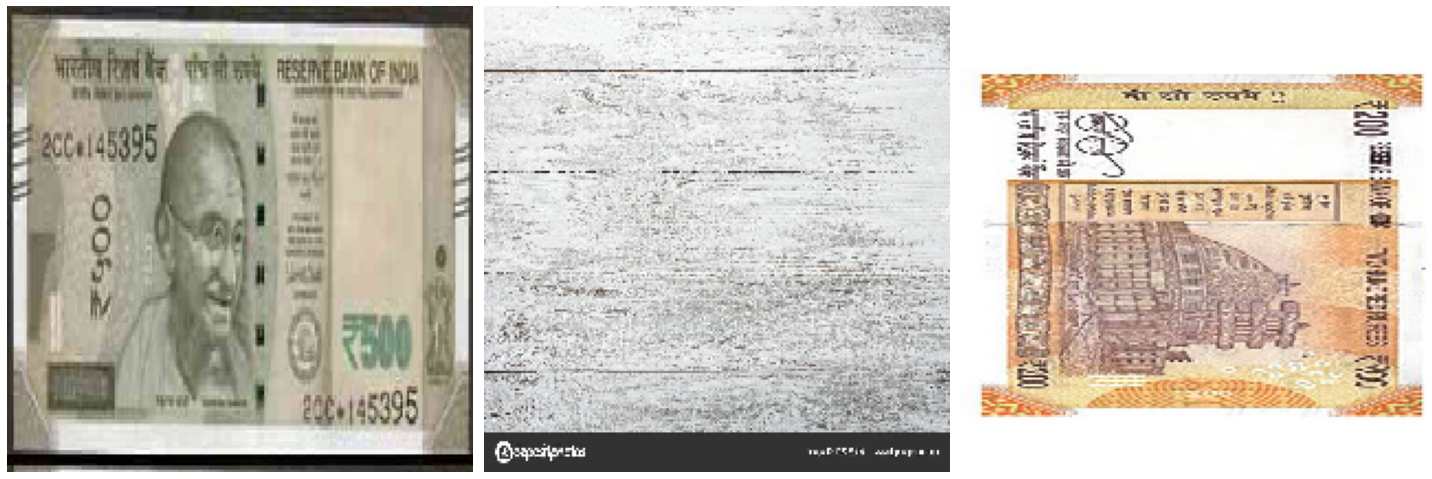

In [42]:
plotImages(sample_training_images[:3])

In [43]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 212, 212, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 106, 106, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 106, 106, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 64)       

In [46]:
batch_size = 32
epochs = 20

In [48]:
num_ten_train = len(os.listdir(train_ten_dir))
num_twenty_train = len(os.listdir(train_twenty_dir))
num_fifty_train = len(os.listdir(train_fifty_dir))
num_hundered_train = len(os.listdir(train_hundered_dir))
num_twohundered_train = len(os.listdir(train_twohundered_dir))
num_fhund_train = len(os.listdir(train_fhund_dir))
num_twothous_train = len(os.listdir(train_twothous_dir))
num_backg_train = len(os.listdir(train_backg_dir))

num_ten_test = len(os.listdir(test_ten_dir))
num_twenty_test = len(os.listdir(test_twenty_dir))
num_fifty_test = len(os.listdir(test_fifty_dir))
num_hundered_test = len(os.listdir(test_hundered_dir))
num_twohundered_test = len(os.listdir(test_twohundered_dir))
num_fhund_test = len(os.listdir(test_fhund_dir))
num_twothous_test = len(os.listdir(test_twothous_dir))
num_backg_test = len(os.listdir(test_backg_dir))

total_train = num_ten_train + num_twenty_train + num_fifty_train + num_hundered_train + num_twohundered_train  + num_fhund_train + num_twothous_train + num_backg_train
total_test = num_ten_test + num_twenty_test + num_fifty_test + num_hundered_test + num_twohundered_test + num_fhund_test + num_twothous_test + num_backg_test

In [49]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/20
25/25 [==============================] - 63s 2s/step - loss: 2.5385 - accuracy: 0.1803 - val_loss: 2.0853 - val_accuracy: 0.1312
Epoch 2/20
25/25 [==============================] - 60s 2s/step - loss: 1.9913 - accuracy: 0.2948 - val_loss: 2.0920 - val_accuracy: 0.1625
Epoch 3/20
25/25 [==============================] - 60s 2s/step - loss: 1.9067 - accuracy: 0.2694 - val_loss: 1.8416 - val_accuracy: 0.3500
Epoch 4/20
25/25 [==============================] - 60s 2s/step - loss: 1.6224 - accuracy: 0.3988 - val_loss: 1.6470 - val_accuracy: 0.3375
Epoch 5/20
25/25 [==============================] - 64s 3s/step - loss: 1.4860 - accuracy: 0.3858 - val_loss: 1.6580 - val_accuracy: 0.3938
Epoch 6/20
25/25 [==============================] - 60s 2s/step - loss: 1.4470 - accuracy: 0.4364 - val_loss: 1.4846 - val_accuracy: 0.4375
Epoch 7/20
25/25 [==============================] - 59s 2s/step - loss: 1.3278 - accuracy: 0.4783 - val_loss: 1.2249 - val_accuracy: 0.5875
Epoch 8/20
25/25 [==

In [51]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()